Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing,Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings 
warnings.filterwarnings('ignore')
import itertools

In [125]:
coke = pd.read_excel(r'C:\Users\Yash Bhosale\Downloads\CocaCola_Sales_Rawdata.xlsx')

In [126]:
coke

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:>

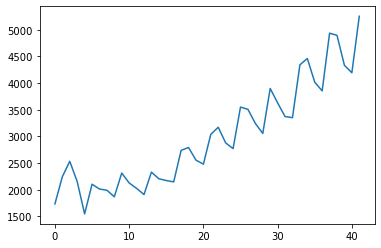

In [46]:
coke['Sales'].plot()

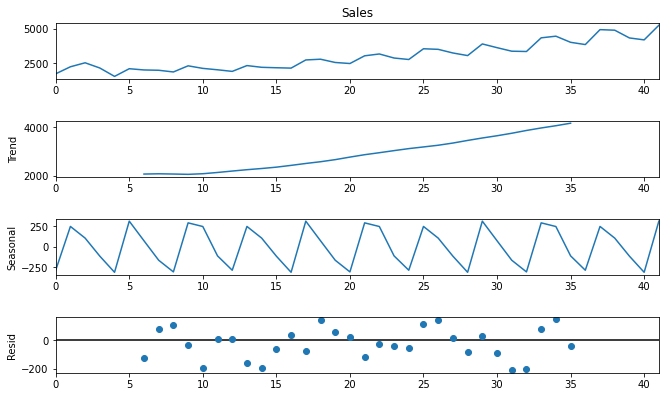

In [47]:
decom = seasonal_decompose(coke['Sales'],period=12)
figure = decom.plot()
figure.set_size_inches(10,6)


In [48]:
train = coke.head(30)
test = coke.tail(12)
test = test['Sales']

In [49]:
# Simple Exponential Model

In [50]:
ses = SimpleExpSmoothing(train['Sales']).fit()
ses_preds = ses.predict(start = test.index[0],end = test.index[-1])
ses_rms = np.sqrt(mean_squared_error(ses_preds,test))
ses_rms

860.8833554735047

In [51]:
coke.mean(),coke.std()

(Sales    2994.353308
 dtype: float64,
 Sales    977.930896
 dtype: float64)

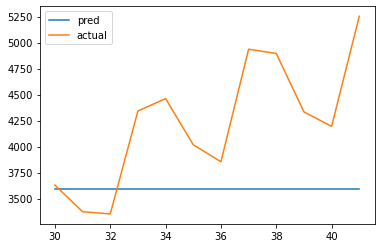

In [52]:
ses_preds.plot(label = 'pred')
test.plot(label = 'actual')
plt.legend()

In [53]:
# Holt's Model (Double Exoponential) Trend

In [54]:
holt = Holt(train['Sales']).fit()
holt_preds = holt.predict(start = test.index[0],end = test.index[-1])
holt_rms = np.sqrt(mean_squared_error(holt_preds,test))
holt_rms

518.1409263383995

<AxesSubplot:>

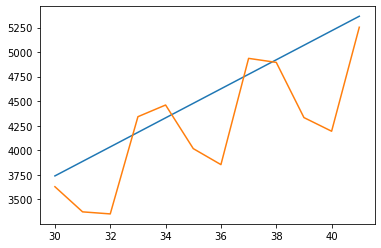

In [55]:
holt_preds.plot()
test.plot()

In [56]:
# Winters Method (Advanced Exponential Method) Additive Seasonality + Additive Trend 

In [57]:
Winter_aa = ExponentialSmoothing(train['Sales'],seasonal= 'add',trend = 'add',seasonal_periods=12).fit()
Winter_aa_preds = Winter_aa.predict(start = test.index[0],end = test.index[-1])
Winter_aa_rms = np.sqrt(mean_squared_error(Winter_aa_preds,test))
Winter_aa_rms

417.14094182719725

<AxesSubplot:>

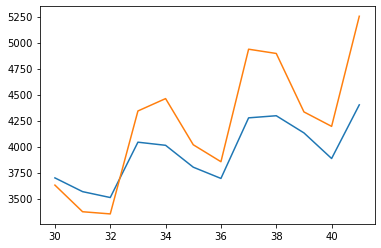

In [58]:
Winter_aa_preds.plot()
test.plot()

In [59]:
# Winters Method (Advanced Exponential Method) Additive Seasonality + Multiplicative Trend

In [60]:
Winter_am = ExponentialSmoothing(train['Sales'],seasonal= 'add',trend = 'mul',seasonal_periods=12).fit()
Winter_am_preds = Winter_am.predict(start = test.index[0],end = test.index[-1])
Winter_am_rms = np.sqrt(mean_squared_error(Winter_am_preds,test))
Winter_am_rms

261.9187390821559

<AxesSubplot:>

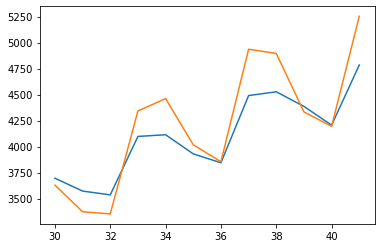

In [61]:
Winter_am_preds.plot()
test.plot()

In [62]:
# Winters Method (Advanced Exponential Method) Multiplicative Seasonality + Additive Trend

In [63]:
Winter_ma = ExponentialSmoothing(train['Sales'],seasonal= 'mul',trend = 'add',seasonal_periods=12).fit()
Winter_ma_preds = Winter_ma.predict(start = test.index[0],end = test.index[-1])
Winter_ma_rms = np.sqrt(mean_squared_error(Winter_ma_preds,test))
Winter_ma_rms

212.6662052084969

<AxesSubplot:>

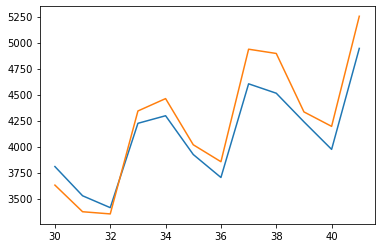

In [64]:
Winter_ma_preds.plot()
test.plot()

In [65]:
# Winters Method (Advanced Exponential Method) Multiplicative Seasonality + Additive Trend



In [66]:
Winter_mm = ExponentialSmoothing(train['Sales'],seasonal= 'mul',trend = 'mul',seasonal_periods=12).fit()
Winter_mm_preds = Winter_mm.predict(start = test.index[0],end = test.index[-1])
Winter_mm_rms = np.sqrt(mean_squared_error(Winter_mm_preds,test))
Winter_mm_rms

164.44898504753377

<AxesSubplot:>

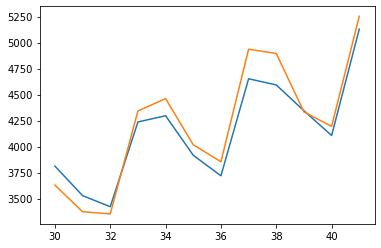

In [67]:
Winter_mm_preds.plot()
test.plot()

In [69]:
# ARIMA Model

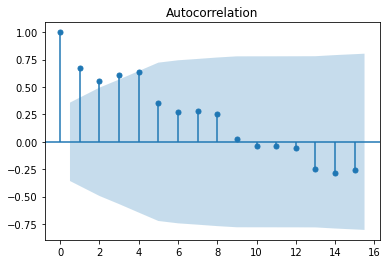

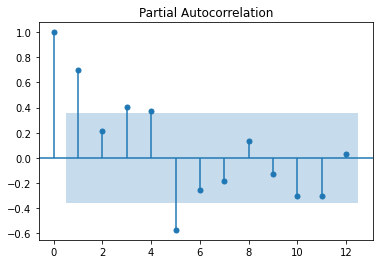

In [75]:
plot_acf(train["Sales"]);
plot_pacf(train['Sales'],lags=12);

In [96]:
p = range(0,12)
d = range(0,3)
q = range(0,12)

parameters = list(itertools.product(p,d,q))

In [97]:
resid = []
params = []
for pdq in parameters:
    try:
        model = ARIMA(train['Sales'],order=pdq).fit()
        preds = model.predict(start = test.index[0],end = test.index[-1])
        rms = np.sqrt(mean_squared_error(preds,test))
        params.append(pdq)
        resid.append(rms)
    except:
        continue
        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.77032D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   7.770D+00
  F =   7.7703153968613403     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47373D+00    |proj g|=  3.68408D-02

At iterate    5    f=  7.45619D+00    |proj g|=  3.78529D-02

At iterate   10    f=  7.44709D+00    |proj g|=  1.64820D-02

At iterate   15    f=  7.44520D+00    |proj g|=  8.63603D-03

At iterate   20    f=  7.44499D+00    |proj g|=  1.81144D-03

At iterate   25    f=  7.44496D+00    |proj g|=  2.00613D-03

At iterate   30    f=  7.44495D+00    |proj g|=  8.59313D-04

At iterate   35    f=  7.44494D+00    |proj g|=  1.19718D-03

At iterate   40    f=  7.44422D+00    |proj g|=  1.33038D-02

At iterate   45    f=  7.44418D+00    |proj g|=  2.24709D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.94390D+00    |proj g|=  1.01694D-01

At iterate    5    f=  6.83133D+00    |proj g|=  3.80426D-02

At iterate   10    f=  6.82279D+00    |proj g|=  1.00849D-02

At iterate   15    f=  6.82194D+00    |proj g|=  2.53886D-03

At iterate   20    f=  6.82115D+00    |proj g|=  1.00041D-02

At iterate   25    f=  6.82098D+00    |proj g|=  1.47873D-03

At iterate   30    f=  6.82092D+00    |proj g|=  7.59339D-03

At iterate   35    f=  6.82088D+00    |proj g|=  3.21156D-03

At iterate   40    f=  6.82086D+00    |proj g|=  2.05977D-03

At iterate   45    f=  6.82084D+00    |proj g|=  2.11795D-03

At iterate   50    f=  6.82083D+00    |proj g|=  1.92699D-03

At iterate   55    f=  6.82082D+00    |proj g|=  1.84865D-03

At iterate   60    f=  6.82079D+00    |proj g|=  5.09628D-03

At iterate   65    f=  6.8

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.94107D+00    |proj g|=  1.01770D-01

At iterate    5    f=  6.83387D+00    |proj g|=  5.14244D-02

At iterate   10    f=  6.81327D+00    |proj g|=  1.67044D-02

At iterate   15    f=  6.81301D+00    |proj g|=  1.62848D-03

At iterate   20    f=  6.81298D+00    |proj g|=  7.39497D-04

At iterate   25    f=  6.81285D+00    |proj g|=  5.64828D-03

At iterate   30    f=  6.81278D+00    |proj g|=  1.89662D-03

At iterate   35    f=  6.81274D+00    |proj g|=  4.84217D-03

At iterate   40    f=  6.81272D+00    |proj g|=  1.73657D-03

At iterate   45    f=  6.81268D+00    |proj g|=  2.54001D-03

At iterate   50    f=  6.81265D+00    |proj g|=  2.53682D-03

At iterate   55    f=  6.81262D+00    |proj g|=  4.17231D-03

At iterate   60    f=  6.81259D+00    |proj g|=  4.48939D-03

At iterate   65    f=  6.8

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30275D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   7.303D+00
  F =   7.3027538536667098     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.85951D+00    |proj g|=  7.89969D-02

At iterate    5    f=  6.80285D+00    |proj g|=  4.08882D-03

At iterate   10    f=  6.80073D+00    |proj g|=  2.76534D-03

At iterate   15    f=  6.80062D+00    |proj g|=  1.39400D-03

At iterate   20    f=  6.80044D+00    |proj g|=  1.09831D-02

At iterate   25    f=  6.80021D+00    |proj g|=  4.91385D-03

At iterate   30    f=  6.80012D+00    |proj g|=  2.82441D-05

At iterate   35    f=  6.80012D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  6.85782D+00    |proj g|=  1.26026D-02

At iterate   15    f=  6.85721D+00    |proj g|=  6.94032D-03

At iterate   20    f=  6.85710D+00    |proj g|=  7.75024D-04

At iterate   25    f=  6.85709D+00    |proj g|=  1.29274D-03

At iterate   30    f=  6.85709D+00    |proj g|=  1.92291D-04

At iterate   35    f=  6.85709D+00    |proj g|=  1.06768D-03

At iterate   40    f=  6.85708D+00    |proj g|=  1.95977D-03

At iterate   45    f=  6.85708D+00    |proj g|=  3.50830D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     76      1     0     0   2.842D-05   6.857D+00
  F =   6.85707722333


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.87089D+00    |proj g|=  6.33610D-02

At iterate    5    f=  6.83206D+00    |proj g|=  1.80171D-02

At iterate   10    f=  6.82672D+00    |proj g|=  1.68532D-03

At iterate   15    f=  6.82629D+00    |proj g|=  3.44649D-03

At iterate   20    f=  6.82585D+00    |proj g|=  4.78053D-03

At iterate   25    f=  6.82465D+00    |proj g|=  1.21827D-02

At iterate   30    f=  6.82395D+00    |proj g|=  2.91944D-04

At iterate   35    f=  6.82395D+00    |proj g|=  8.43770D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.79052D+00    |proj g|=  1.12122D-01

At iterate    5    f=  6.69797D+00    |proj g|=  1.17437D-01

At iterate   10    f=  6.66805D+00    |proj g|=  5.08082D-03

At iterate   15    f=  6.66792D+00    |proj g|=  2.98641D-03

At iterate   20    f=  6.66770D+00    |proj g|=  2.54516D-03

At iterate   25    f=  6.66765D+00    |proj g|=  1.74269D-03

At iterate   30    f=  6.66764D+00    |proj g|=  1.61888D-03

At iterate   35    f=  6.66764D+00    |proj g|=  2.84217D-04

At iterate   40    f=  6.66764D+00    |proj g|=  7.64810D-04

At iterate   45    f=  6.66763D+00    |proj g|=  3.66551D-04

At iterate   50    f=  6.66763D+00    |proj g|=  7.34879D-04

At iterate   55    f=  6.66762D+00    |proj g|=  1.73248D-03

At iterate   60    f=  6.66760D+00    |proj g|=  1.88347D-03

At iterate   65    f=  6.6


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.76000D+00    |proj g|=  8.64247D-02

At iterate    5    f=  6.73072D+00    |proj g|=  4.90377D-02


 This problem is unconstrained.



At iterate   10    f=  6.72242D+00    |proj g|=  8.15819D-03

At iterate   15    f=  6.72152D+00    |proj g|=  7.19025D-03

At iterate   20    f=  6.72020D+00    |proj g|=  7.80398D-03

At iterate   25    f=  6.71936D+00    |proj g|=  8.99032D-03

At iterate   30    f=  6.71892D+00    |proj g|=  2.22284D-03

At iterate   35    f=  6.71889D+00    |proj g|=  1.49214D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     39     50      1     0     0   1.243D-06   6.719D+00
  F =   6.7188915014554285     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.75735D+00    |proj g|=  9.03471D-02

At iterate    5    f=  6.71281D+00    |proj g|=  1.67462D-02

At iterate   10    f=  6.70546D+00    |proj g|=  1.64105D-02

At iterate   15    f=  6.70376D+00    |proj g|=  8.58860D-03

At iterate   20    f=  6.70170D+00    |proj g|=  1.59718D-02

At iterate   25    f=  6.69911D+00    |proj g|=  2.32033D-02

At iterate   30    f=  6.69714D+00    |proj g|=  1.26524D-02

At iterate   35    f=  6.69687D+00    |proj g|=  5.44365D-04

At iterate   40    f=  6.69687D+00    |proj g|=  6.03961D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72197D+00    |proj g|=  6.90274D-02


 This problem is unconstrained.



At iterate    5    f=  6.67932D+00    |proj g|=  2.04557D-02

At iterate   10    f=  6.66943D+00    |proj g|=  1.71588D-02

At iterate   15    f=  6.66645D+00    |proj g|=  1.92051D-03

At iterate   20    f=  6.66585D+00    |proj g|=  5.30136D-03

At iterate   25    f=  6.66540D+00    |proj g|=  1.93565D-02

At iterate   30    f=  6.66454D+00    |proj g|=  1.19739D-02

At iterate   35    f=  6.66330D+00    |proj g|=  1.38813D-02

At iterate   40    f=  6.66174D+00    |proj g|=  1.54190D-02

At iterate   45    f=  6.66111D+00    |proj g|=  2.98641D-03

At iterate   50    f=  6.66094D+00    |proj g|=  4.70290D-04

At iterate   55    f=  6.66094D+00    |proj g|=  7.33635D-05

At iterate   60    f=  6.66094D+00    |proj g|=  3.10862D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.68775D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   7.688D+00
  F =   7.6877507297084531     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.16887D+00    |proj g|=  2.92151D-02

At iterate   15    f=  7.14890D+00    |proj g|=  1.68577D-02

At iterate   20    f=  7.14445D+00    |proj g|=  2.93099D-06

At iterate   25    f=  7.14445D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     40      1     0     0   8.882D-08   7.144D+00
  F =   7.1444475699711116     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   40    f=  6.84464D+00    |proj g|=  4.35207D-06

At iterate   45    f=  6.84464D+00    |proj g|=  2.84217D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     71      1     0     0   2.931D-06   6.845D+00
  F =   6.8446392280453745     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11977D+00    |proj g|=  1.44531D-01

At iterate    5    f=  6.93670D+00    |proj g|=  8.05614D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  6.85884D+00    |proj g|=  7.40927D-03

At iterate   25    f=  6.85864D+00    |proj g|=  4.17444D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     33      1     0     0   5.329D-07   6.859D+00
  F =   6.8586428867540761     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09789D+00    |proj g|=  1.43717D-01

At iterate    5    f=  6.87691D+00    |proj g|=  4.93428D-02

At iterate   10    f=  6.86514D+00    |proj g|=  3.73834D-02

At iterate   15    f=  6.82868D+00    |proj g|=  4.41128D-02

At iterate   20    f=  6.82578D+00    |proj g|=  1.01616D-03

At iterate   25    f=  6.82577D+00    |proj g|=  7.37188D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     36      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  6.83807D+00    |proj g|=  5.43636D-03

At iterate   15    f=  6.82852D+00    |proj g|=  6.08752D-02

At iterate   20    f=  6.78471D+00    |proj g|=  6.26666D-02

At iterate   25    f=  6.76863D+00    |proj g|=  2.33235D-02

At iterate   30    f=  6.76812D+00    |proj g|=  7.61169D-05

At iterate   35    f=  6.76812D+00    |proj g|=  1.70530D-05

At iterate   40    f=  6.76812D+00    |proj g|=  1.57208D-04

At iterate   45    f=  6.76812D+00    |proj g|=  1.17506D-04

At iterate   50    f=  6.76812D+00    |proj g|=  3.41949D-05

At iterate   55    f=  6.76812D+00    |proj g|=  2.16716D-05

At iterate   60    f=  6.76812D+00    |proj g|=  1.77636D-05

At iterate   65    f=  6.76812D+00    |proj g|=  4.09450D-05

At iterate   70    f=  6.76812D+00    |proj g|=  1.58096D-05

At iterate   75    f=  6.76812D+00    |proj g|=  1.17240D-05

At iterate   80    f=  6.76812D+00    |proj g|=  5.09814D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   85    f=  6.76812D+00    |proj g|=  1.24345D-05

At iterate   90    f=  6.76812D+00    |proj g|=  4.88498D-06

At iterate   95    f=  6.76812D+00    |proj g|=  2.48690D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     96    153      2     0     0   1.599D-06   6.768D+00
  F =   6.7681190809865184     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07325D+00    |proj g|=  1.15527D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  6.95226D+00    |proj g|=  1.92596D-02

At iterate   15    f=  6.94120D+00    |proj g|=  4.18630D-02

At iterate   20    f=  6.91637D+00    |proj g|=  7.27516D-02

At iterate   25    f=  6.74628D+00    |proj g|=  2.31999D-01

At iterate   30    f=  6.71131D+00    |proj g|=  2.65219D-02

At iterate   35    f=  6.70787D+00    |proj g|=  1.48873D-02

At iterate   40    f=  6.70773D+00    |proj g|=  2.74447D-05

At iterate   45    f=  6.70773D+00    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     45     58      1     0     0   5.329D-07   6.708D+00
  F =   6.70772730177

 This problem is unconstrained.



At iterate   10    f=  6.74365D+00    |proj g|=  2.24047D-02

At iterate   15    f=  6.73935D+00    |proj g|=  1.26387D-02

At iterate   20    f=  6.72287D+00    |proj g|=  2.76553D-02

At iterate   25    f=  6.69977D+00    |proj g|=  3.98587D-02

At iterate   30    f=  6.69800D+00    |proj g|=  1.31415D-03

At iterate   35    f=  6.69784D+00    |proj g|=  1.53638D-02

At iterate   40    f=  6.69735D+00    |proj g|=  2.32268D-03

At iterate   45    f=  6.69734D+00    |proj g|=  1.77813D-04

At iterate   50    f=  6.69734D+00    |proj g|=  1.69642D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     69   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05713D+00    |proj g|=  8.99478D-02

At iterate    5    f=  6.97038D+00    |proj g|=  4.69620D-02

At iterate   10    f=  6.95814D+00    |proj g|=  1.91315D-02

At iterate   15    f=  6.92457D+00    |proj g|=  1.05630D-01

At iterate   20    f=  6.78901D+00    |proj g|=  1.33278D-01

At iterate   25    f=  6.67206D+00    |proj g|=  8.51005D-02

At iterate   30    f=  6.64508D+00    |proj g|=  1.60012D-02

At iterate   35    f=  6.64283D+00    |proj g|=  4.50369D-03

At iterate   40    f=  6.64264D+00    |proj g|=  3.78630D-04

At iterate   45    f=  6.64263D+00    |proj g|=  1.45981D-03

At iterate   50    f=  6.64263D+00    |proj g|=  8.77520D-05

At iterate   55    f=  6.64263D+00    |proj g|=  1.70530D-05

At iterate   60    f=  6.64263D+00    |proj g|=  4.17444D-06

           * * *

Tit   = 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.32287D+00    |proj g|=  6.94551D-02

At iterate   30    f=  7.27330D+00    |proj g|=  2.96911D-02

At iterate   35    f=  7.27146D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     85      1     0     0   1.776D-07   7.271D+00
  F =   7.2714629706812310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15262D+01    |proj g|=  2.79848D-01

At iterate    5    f=  1.12340D+01    |proj g|=  4.30127D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     71      2     0     0   3.649D-03   1.123D+01
  F =   11.228272788879739     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33021D+00    |proj g|=  3.55585D-02

At iterate    5    f=  7.28529D+00    |proj g|=  5.54944D-02

At iterate   10    f=  7.18870D+00    |proj g|=  2.66310D-01

At iterate   15    f=  7.15705D+00    |proj g|=  4.63629D-05

At iterate   20    f=  7.15705D+00    |proj g|=  2.13518D-04

At iterate   25    f=  7.15704D+00    |proj g|=  2.87779D-03

At iterate   30    f=  7.15566D+00    |proj g|=  2.84030D-02

At iterate   35    f=  7.15349D+00    |proj g|=  2.61196D-03

At iterate   40    f=  7.15328D+00    |proj g|=  7.10543D-06

At iterate   45    f=  7.15328D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   35    f=  6.89432D+00    |proj g|=  1.88799D-02

At iterate   40    f=  6.89282D+00    |proj g|=  2.12079D-03

At iterate   45    f=  6.89272D+00    |proj g|=  2.93277D-04

At iterate   50    f=  6.89272D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     53     93      2     0     0   1.776D-07   6.893D+00
  F =   6.8927218493156355     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28985D+00    |proj g|=  1.80060D-03

At iterate    5    f=  7.28984D+00    |proj g|=  9.26015D-04

At iterate   10    f=  7.28955D+00    |proj g|=  8.13625D-03

At iterate   15    f=  7.28919D+00    |proj g|=  6.12843D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     22      1     0     0   0.000D+00   7.289D+00
  F =   7.2891909533078563     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.14053D+00    |proj g|=  7.62679D-03

At iterate   20    f=  7.14026D+00    |proj g|=  5.32907D-07

At iterate   25    f=  7.14026D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     31      1     0     0   0.000D+00   7.140D+00
  F =   7.1402574168677084     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.87196D+00    |proj g|=  1.00400D-01

At iter

 This problem is unconstrained.



At iterate   20    f=  6.80370D+00    |proj g|=  1.02091D-02

At iterate   25    f=  6.80315D+00    |proj g|=  7.79821D-05

At iterate   30    f=  6.80315D+00    |proj g|=  4.88498D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     43      1     0     0   3.553D-07   6.803D+00
  F =   6.8031514145104408     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.64194D+00    |proj g|=  4.68630D-03

At iterate    5    f=  7.64189D+00    |proj g|=  2.47091D-04

At iterate   10    f=  7.64186D+00    |proj g|=  2.40590D-03

At iterate   15    f=  7.64183D+00    |proj g|=  7.99361D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     19      1     0     0   0.000D+00   7.642D+00
  F =   7.6418320228384191     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34002D+00    |proj g|=  2.04375D-02

At iterate    5    f=  7.33642D+00    |proj g|=  3.47281D-05

At iterate   10    f=  7.33642D+00    |proj g|=  5.10525D-04

At iterate   15    f=  7.33583D+00    |proj g|=  5.59410D-03

At iterate   20    f=  7.32505D+00    |proj g|=  1.34058D-02

At iterate   25    f=  7.31807D+00    |proj g|=  2.26485D-05

At iterate   30    f=  7.31807D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  7.37230D+00    |proj g|=  3.79725D-02

At iterate   10    f=  7.34959D+00    |proj g|=  8.36393D-02

At iterate   15    f=  7.20505D+00    |proj g|=  6.06200D-02

At iterate   20    f=  7.12431D+00    |proj g|=  4.19789D-03

At iterate   25    f=  7.12140D+00    |proj g|=  7.85860D-04

At iterate   30    f=  7.12121D+00    |proj g|=  8.31335D-05

At iterate   35    f=  7.12119D+00    |proj g|=  1.45564D-03

At iterate   40    f=  7.12118D+00    |proj g|=  4.40541D-05

At iterate   45    f=  7.12118D+00    |proj g|=  4.57234D-04

At iterate   50    f=  7.12117D+00    |proj g|=  5.53513D-04

At iterate   55    f=  7.12117D+00    |proj g|=  9.68114D-05

At iterate   60    f=  7.12117D+00    |proj g|=  4.75353D-04

At iterate   65    f=  7.12114D+00    |proj g|=  1.04894D-03

At iterate   70    f=  7.11717D+00    |proj g|=  1.40988D-02

At iterate   75    f=  7.11565D+00    |proj g|=  5.60707D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.24981D+00    |proj g|=  2.84894D-02

At iterate   10    f=  7.12141D+00    |proj g|=  1.82332D-02

At iterate   15    f=  7.09147D+00    |proj g|=  8.11244D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  7.09028D+00    |proj g|=  3.48166D-05

At iterate   25    f=  7.09028D+00    |proj g|=  3.89022D-04

At iterate   30    f=  7.09012D+00    |proj g|=  5.04627D-03

At iterate   35    f=  7.08677D+00    |proj g|=  5.11875D-03

At iterate   40    f=  7.08663D+00    |proj g|=  4.44089D-05

At iterate   45    f=  7.08663D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     83      2     0     0   3.553D-07   7.087D+00
  F =   7.0866310973395619     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09274D+00    |proj g|=  1.71971D-02

At iterate    5    f=  7.09248D+00    |proj g|=  2.20091D-04

At iterate   10    f=  7.09247D+00    |proj g|=  4.07265D-03

At iterate   15    f=  7.09200D+00    |proj g|=  6.22569D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   0.000D+00   7.092D+00
  F =   7.0919123542611535     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  6.87254D+00    |proj g|=  1.94348D-02

At iterate   10    f=  6.87120D+00    |proj g|=  2.72582D-04

At iterate   15    f=  6.87103D+00    |proj g|=  3.08322D-03

At iterate   20    f=  6.87055D+00    |proj g|=  7.78577D-04

At iterate   25    f=  6.87055D+00    |proj g|=  1.77636D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     43      1     0     0   7.994D-07   6.871D+00
  F =   6.8705516663210444     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.77757D+00    |proj g|=  4.75790D-01

At iterate    5    f=  6.72846D+00    |proj g|=  5.86765D-02

At iterate   10    f=  6.72128D+00    |proj g|=  4.95637D-02

At iterate   15    f=  6.71035D+00    |proj g|=  7.10747D-03

At iterate   20    f=  6.71001D+00    |proj g|=  1.05348D-02

At iterate   25    f=  6.70979D+00    |proj g|=  3.64189D-03

At iterate   30    f=  6.70594D+00    |proj g|=  6.51958D-03

At iterate   35    f=  6.70588D+00    |proj g|=  1.77636D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.53803D+00    |proj g|=  1.58323D-02

At iterate    5    f=  7.53775D+00    |proj g|=  1.71418D-04

At iterate   10    f=  7.53754D+00    |proj g|=  6.15641D-03

At iterate   15    f=  7.53699D+00    |proj g|=  1.27720D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     29      1     0     0   0.000D+00   7.537D+00
  F =   7.5369903537954368     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   20    f=  6.77426D+00    |proj g|=  1.75537D-01

At iterate   25    f=  6.77159D+00    |proj g|=  2.91514D-02

At iterate   30    f=  6.76982D+00    |proj g|=  2.82175D-02

At iterate   35    f=  6.76887D+00    |proj g|=  2.26899D-02

At iterate   40    f=  6.76629D+00    |proj g|=  1.88508D-01

At iterate   45    f=  6.76209D+00    |proj g|=  1.28953D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     80      1     0     0   9.711D-04   6.762D+00
  F =   6.7620697255463238     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34553D+00    |proj g|=  2.40881D-02

At iterate    5    f=  7.19348D+00    |proj g|=  1.20522D-01

At iterate   10    f=  7.17323D+00    |proj g|=  1.93241D-03

At iterate   15    f=  7.17323D+00    |proj g|=  4.75175D-05

At iter

 This problem is unconstrained.



At iterate   40    f=  7.17089D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     62      1     0     0   1.776D-07   7.171D+00
  F =   7.1708911821492798     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.84530D+00    |proj g|=  1.07979D-02

At iterate    5    f=  6.84343D+00    |proj g|=  1.72822D-03

At iterate   10    f=  6.84340D+00    |proj g|=  9.93605D-04

At iterate   15    f=  6.84335D+00    |proj g|=  1.46549D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     25      1     0     0   2.398D-06   6.843D+00
  F =   6.8433523528060585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.73495D+00    |proj g|=  8.42051D-02

At iterate    5    f=  6.65552D+00    |proj g|=  2.25569D-02

At iterate   10    f=  6.65468D+00    |proj g|=  3.66871D-03

At iterate   15    f=  6.65230D+00    |proj g|=  1.83995D-03

At iterate   20    f=  6.65162D+00    |proj g|=  5.90195D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     78      2     0     0   2.368D-03   6.652D+00
  F =   6.6516145175918382     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72191D+00    |proj g|=  6.33806D-02

At iterate    5    f=  6.69053D+00    |proj g|=  4.63650D-02

At iterate   10    f=  6.68095D+00    |proj g|=  3.25542D-02

At iterate   15    f=  6.67865D+00    |proj g|=  2.02522D-02

At iterate   20    f=  6.67856D+00    |proj g|=  7.67244D-03

At iterate   25    f=  6.67840D+00    |proj g|=  1.13243D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     41      1     0     0   

 This problem is unconstrained.



At iterate   35    f=  6.67154D+00    |proj g|=  2.22045D-06

At iterate   40    f=  6.67154D+00    |proj g|=  5.41789D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     81      2     0     0   2.309D-06   6.672D+00
  F =   6.6715432252849478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25915D+00    |proj g|=  2.29613D-02

At iterate    5    f=  7.25368D+00    |proj g|=  4.69270D-02

At iterate   10    f=  7.24583D+00    |proj g|=  2.77353D-02

At iterate   15    f=  7.19662D+00    |proj g|=  6.01251D-02

At iterate   20    f=  7.05765D+00    |proj g|=  4.11596D-02

At iterate   25    f=  7.05495D+00    |proj g|=  6.41265D-05

At iterate   30    f=  7.05495D+00    |proj g|=  1.21325D-03

At iterate   35    f=  7.05451D+00    |proj g|=  1.53922D-02

At iterate   40    f=  7.05217D+00    |proj g|=  1.88880D-03

At iterate   45    f=  7.05216D+00    |proj g

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     70      1     0     0   6.484D-06   7.052D+00
  F =   7.0521647030666124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.64340D+00    |proj g|=  6.79625D-02

At iterate    5    f=  6.61209D+00    |proj g|=  2.84492D-02

At iterate   10    f=  6.60316D+00    |proj g|=  5.98579D-02

At iterate   15    f=  6.60068D+00    |proj g|=  1.06605D-02

At iterate   20    f=  6.60060D+00    |proj g|=  2.07869D-03

At iterate   25    f=  6.59767D+00    |proj g|=  4.37597D-02

At iterate   30    f=  6.59006D+00    |proj g|=  1.90719D-03

At iterate   35    f=  6.59005D+00    |proj g|=  2.23466D-04

At iterate   40    f=  6.59005D+00    |proj g|=  9.59233D-06

At iterate   45    f=  6.59005D+00    |proj g|=  1.24345D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.63371D+00    |proj g|=  6.68014D-02

At iterate    5    f=  6.60760D+00    |proj g|=  1.77001D-02

At iterate   10    f=  6.59536D+00    |proj g|=  3.04920D-02

At iterate   15    f=  6.59158D+00    |proj g|=  1.75178D-02

At iterate   20    f=  6.58944D+00    |proj g|=  8.26601D-03

At iterate   25    f=  6.58930D+00    |proj g|=  2.94840D-03

At iterate   30    f=  6.58834D+00    |proj g|=  6.38973D-03

At iterate   35    f=  6.58634D+00    |proj g|=  2.24174D-02

At iterate   40    f=  6.58327D+00    |proj g|=  1.85383D-02

At iterate   45    f=  6.58277D+00    |proj g|=  1.49347D-02

At iterate   50    f=  6.58267D+00    |proj g|=  1.36779D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  7.12369D+00    |proj g|=  2.19723D-02
  ys=-3.022E-04  -gs= 1.456E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  7.12363D+00    |proj g|=  4.57640D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21    135      3     1     0   4.576D-02   7.124D+00
  F =   7.1236308290941563     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72260D+00    |proj g|=  7.15124D-02

At iterate    5    f=  6.68923D+00    |proj g|=  2.17453D-02

At iterate   10    f=  6.68379D+00    |proj g|=  9.89542D-02

At iterate   15    f=  6.67898D+00    |proj g|=  1.21915D-02

At iterate   20    f=  6.67740D+00    |proj g|=  7.35856D-03

At iterate   25    f=  6.67737D+00    |proj g|=  5.12923D-04

At iterate   30    f=  6.67731D+00    |proj g|=  3.62048D-03


 This problem is unconstrained.



At iterate   35    f=  6.67729D+00    |proj g|=  4.97380D-05
  ys=-6.577E-11  -gs= 7.974E-11 BFGS update SKIPPED

At iterate   40    f=  6.67729D+00    |proj g|=  2.19380D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     67      1     1     0   2.194D-05   6.677D+00
  F =   6.6772934114329558     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.63111D+00    |proj g|=  6.69653D-02

At iterate    5    f=  6.59626D+00    |proj g|=  2.18549D-02

At iterate   10    f=  6.59049D+00    |proj g|=  1.17123D-02

At iterate   15    f=  6.58705D+00    |proj g|=  3.55300D-02

At iterate   20    f=  6.58636D+00    |proj g|=  2.22222D-04

At iterate   25    f=  6.58636D+00    |proj g|=  5.45342D-05

At iterate   30    f=  6.58636D+00    |proj g|=  2.34479D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09519D+00    |proj g|=  1.61323D-01

At iterate    5    f=  6.94721D+00    |proj g|=  1.57179D-02

At iterate   10    f=  6.94244D+00    |proj g|=  1.58484D-02


 This problem is unconstrained.



At iterate   15    f=  6.94133D+00    |proj g|=  7.07647D-03

At iterate   20    f=  6.94132D+00    |proj g|=  4.51328D-03

At iterate   25    f=  6.94132D+00    |proj g|=  5.41762D-03
  ys=-1.702E-15  -gs= 1.020E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30    153      2     1     0   8.745D-03   6.941D+00
  F =   6.9413154131845980     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39177D+00    |proj g|=  3.27543D-01

At iterate    5    f=  6.85856D+00    |proj g|=  1.36531D-02

At iterate   10    f=  6.84557D+00    |proj g|=  1.87954D-02

At iterate   15    f=  6.82473D+00    |proj g|=  3.70615D-02

At iterate   20    f=  6.80850D+00    |proj g|=  2.81307D-02

At iterate   25    f=  6.79178D+00    |proj g|=  8.30132D-02

At iterate   30    f=  6.77783D+00    |proj g|=  5.67279D-02

At iterate   35    f=  6.76565D+00    |proj g|=  5.31183D-02

At iterate   40    f=  6.75742D+00    |proj g|=  1.15024D-02

At iterate   45    f=  6.75618D+00    |proj g|=  9.40759D-04

At iterate   50    f=  6.75618D+00    |proj g|=  2.60680D-04

At iterate   55    f=  6.75618D+00    |proj g|=  7.43050D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.64460D+00    |proj g|=  1.26988D-01

At iterate    5    f=  6.61634D+00    |proj g|=  1.24247D-01

At iterate   10    f=  6.60627D+00    |proj g|=  2.18636D-02

At iterate   15    f=  6.59826D+00    |proj g|=  1.58327D-02

At iterate   20    f=  6.59520D+00    |proj g|=  9.10552D-03

At iterate   25    f=  6.59505D+00    |proj g|=  8.85159D-04

At iterate   30    f=  6.59306D+00    |proj g|=  1.99709D-02

At iterate   35    f=  6.58501D+00    |proj g|=  2.15601D-02


 This problem is unconstrained.



At iterate   40    f=  6.58495D+00    |proj g|=  1.23457D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     51      1     0     0   1.776D-06   6.585D+00
  F =   6.5849455097351344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.64264D+00    |proj g|=  3.96845D-01

At iterate    5    f=  6.61857D+00    |proj g|=  1.36713D-02

At iterate   10    f=  6.61770D+00    |proj g|=  7.66223D-03

At iterate   15    f=  6.61703D+00    |proj g|=  3.76987D-03

At iterate   20    f=  6.61658D+00    |proj g|=  7.46807D-03


 This problem is unconstrained.



At iterate   25    f=  6.61468D+00    |proj g|=  3.09353D-03

At iterate   30    f=  6.61468D+00    |proj g|=  3.76588D-05

At iterate   35    f=  6.61468D+00    |proj g|=  2.63789D-05

At iterate   40    f=  6.61468D+00    |proj g|=  2.64677D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     79      1     0     0   1.368D-05   6.615D+00
  F =   6.6146803669145848     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68540D+00    |proj g|=  4.97308D-01

At iterate    5    f=  6.64726D+00    |proj g|=  2.14281D-01

At iterate   10    f=  6.58755D+00    |proj g|=  4.04987D-02

At iterate   15    f=  6.57020D+00    |proj g|=  1.82408D-01

At iterate   20    f=  6.55682D+00    |proj g|=  2.64460D-02

At iterate   25    f=  6.55479D+00    |proj g|=  3.10348D-02

At iterate   30    f=  6.55343D+00    |proj g|=  5.54028D-03

At iterate   35    f=  6.55332D+00    |proj g|=  3.50209D-04

At iterate   40    f=  6.55331D+00    |proj g|=  1.92912D-04

At iterate   45    f=  6.55331D+00    |proj g|=  3.22409D-04

At iterate   50    f=  6.55331D+00    |proj g|=  1.86340D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.43875D+00    |proj g|=  2.55625D-01

At iterate    5    f=  6.69638D+00    |proj g|=  3.14616D-02

At iterate   10    f=  6.65428D+00    |proj g|=  2.44396D-02

At iterate   15    f=  6.58937D+00    |proj g|=  5.62403D-02

At iterate   20    f=  6.58690D+00    |proj g|=  7.94094D-03

At iterate   25    f=  6.58654D+00    |proj g|=  3.31797D-03

At iterate   30    f=  6.58653D+00    |proj g|=  1.71418D-03

At iterate   35    f=  6.58653D+00    |proj g|=  2.04183D-03

At iterate   40    f=  6.58653D+00    |proj g|=  1.52065D-03

At iterate   45    f=  6.58653D+00    |proj g|=  7.41718D-04

At iterate   50    f=  6.58653D+00    |proj g|=  1.14158D-03
  ys=-1.580E-12  -gs= 2.230E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   55    f=  6.58653D+00    |proj g|=  2.25704D-03
  ys=-2.962E-08  -gs= 2.844E-08 BFGS update SKIPPED

At iterate   60    f=  6.58653D+00    |proj g|=  1.03491D-03

At iterate   65    f=  6.58653D+00    |proj g|=  7.35501D-04

At iterate   70    f=  6.58653D+00    |proj g|=  3.48743D-03
  ys=-5.193E-13  -gs= 8.716E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   75    f=  6.58653D+00    |proj g|=  9.88276D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     79    338      4     3     0   1.169D-03   6.587D+00
  F =   6.5865275684115332     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18079D+00    |proj g|=  3.47221D+06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     68      2     0     0   3.967D+06   7.138D+00
  F =   7.1382937694161219     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50358D+00    |proj g|=  3.99695D-01

At iterate    5    f=  6.85827D+00    |proj g|=  3.20683D-01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f=  6.81116D+00    |proj g|=  1.53687D-01
  ys=-9.178E-11  -gs= 3.176E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f=  6.81073D+00    |proj g|=  1.41062D-01

At iterate   20    f=  6.81056D+00    |proj g|=  6.49930D-02
  ys=-1.587E-08  -gs= 2.524E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24    181      5     2     0   2.690D-01   6.811D+00
  F =   6.8105612544841385     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.15559D+00    |proj g|=  1.49688D+00
  ys=-1.651E-10  -gs= 1.277E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  7.02275D+00    |proj g|=  3.68799D-01

At iterate   10    f=  6.94649D+00    |proj g|=  1.12603D-01

At iterate   15    f=  6.93677D+00    |proj g|=  2.65040D-01

At iterate   20    f=  6.91864D+00    |proj g|=  3.03792D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  6.88044D+00    |proj g|=  4.35187D-01
  ys=-1.066E-04  -gs= 5.600E-04 BFGS update SKIPPED

At iterate   30    f=  6.87727D+00    |proj g|=  6.16992D-01

At iterate   35    f=  6.87700D+00    |proj g|=  5.29603D-01
  ys=-1.152E-04  -gs= 1.280E-04 BFGS update SKIPPED
  ys=-1.565E-03  -gs= 1.150E-03 BFGS update SKIPPED

At iterate   40    f=  6.87698D+00    |proj g|=  3.58223D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  6.87696D+00    |proj g|=  6.58382D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  6.87664D+00    |proj g|=  8.78498D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   55    f=  6.87467D+00    |proj g|=  7.13617D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     55    426      7     4     0   7.136D-01   6.875D+00
  F =   6.8746656398555075     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10127D+00    |proj g|=  1.19624D+05
  ys=-2.421E-02  -gs= 1.967E-03 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     42      1     1     0   2.933D+05   7.099D+00
  F =   7.0985547029822147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05046D+00    |proj g|=  3.18564D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   3.186D+06   7.050D+00
  F =   7.0504638257830718     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.82854D+00    |proj g|=  3.00483D-01

At iterate    5    f=  6.61458D+00    |proj g|=  4.12196D-02

At iterate   10    f=  6.56257D+00    |proj g|=  5.73923D-02

At iterate   15    f=  6.55279D+00    |proj g|=  2.09567D-02


 This problem is unconstrained.



At iterate   20    f=  6.54929D+00    |proj g|=  6.83977D-03

At iterate   25    f=  6.54850D+00    |proj g|=  1.30917D-03

At iterate   30    f=  6.54849D+00    |proj g|=  1.68372D-03

At iterate   35    f=  6.54846D+00    |proj g|=  3.10276D-03

At iterate   40    f=  6.54836D+00    |proj g|=  1.07869D-03

At iterate   45    f=  6.54834D+00    |proj g|=  1.27631D-04

At iterate   50    f=  6.54834D+00    |proj g|=  3.46390D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     53     80      1     0     0   6.413D-05   6.548D+00
  F =   6.5483388873152704     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89147D+00    |proj g|=  1.07343D-01

At iterate    5    f=  6.84304D+00    |proj g|=  9.56826D-03

At iterate   10    f=  6.84105D+00    |proj g|=  1.39835D-03

At iterate   15    f=  6.84091D+00    |proj g|=  5.91642D-03

At iterate   20    f=  6.83383D+00    |proj g|=  3.37715D-02

At iterate   25    f=  6.82595D+00    |proj g|=  3.10312D-03

At iterate   30    f=  6.82594D+00    |proj g|=  2.13163D-06

           * *

 This problem is unconstrained.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.55433D+00    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06697D+00    |proj g|=  2.32000D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     35      1     0     0   1.449D+05   7.065D+00
  F =   7.0652163071745546     



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17781D+00    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.90732D+00    |proj g|=  1.60258D-01

At iterate    5    f=  6.79551D+00    |proj g|=  1.83844D-02

At iterate   10    f=  6.79219D+00    |proj g|=  2.71578D-03

At iterate   15    f=  6.79216D+00    |proj g|=  1.43405D-03

At iterate   20    f=  6.79189D+00    |proj g|=  1.11799D-02

At iterate   25    f=  6.78163D+00    |proj g|=  5.32286D-02

At iterate   30    f=  6.76556D+00    |proj g|=  5.61915D-03

At iterate   35    f=  6.76530D+00    |proj g|=  8.34888D-05

At iterate   40    f=  6.76530D+00    |proj g|=  1.77636D-07

           * * *



 This problem is unconstrained.


In [98]:
para = pd.DataFrame(resid,params)
para[0].sort_values()

(6, 0, 1)       258.354827
(5, 0, 0)       585.876592
(6, 0, 0)       619.385900
(1, 0, 4)       839.942132
(1, 0, 3)       918.685805
                  ...     
(0, 2, 9)      4334.333712
(2, 2, 1)      4334.381909
(0, 2, 11)     4340.495357
(0, 2, 10)     4369.170164
(1, 0, 2)     31672.548235
Name: 0, Length: 80, dtype: float64

In [101]:
arima = ARIMA(train['Sales'],order=(6, 0, 1)).fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.15559D+00    |proj g|=  1.49688D+00
  ys=-1.651E-10  -gs= 1.277E-09 BFGS update SKIPPED


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  7.02275D+00    |proj g|=  3.68799D-01

At iterate   10    f=  6.94649D+00    |proj g|=  1.12603D-01

At iterate   15    f=  6.93677D+00    |proj g|=  2.65040D-01

At iterate   20    f=  6.91864D+00    |proj g|=  3.03792D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  6.88044D+00    |proj g|=  4.35187D-01
  ys=-1.066E-04  -gs= 5.600E-04 BFGS update SKIPPED

At iterate   30    f=  6.87727D+00    |proj g|=  6.16992D-01

At iterate   35    f=  6.87700D+00    |proj g|=  5.29603D-01
  ys=-1.152E-04  -gs= 1.280E-04 BFGS update SKIPPED
  ys=-1.565E-03  -gs= 1.150E-03 BFGS update SKIPPED

At iterate   40    f=  6.87698D+00    |proj g|=  3.58223D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  6.87696D+00    |proj g|=  6.58382D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  6.87664D+00    |proj g|=  8.78498D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   55    f=  6.87467D+00    |proj g|=  7.13617D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     55    426      7     4     0   7.136D-01   6.875D+00
  F =   6.8746656398555075     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [104]:
arima_preds = arima.predict(start = test.index[0], end = test.index[-1])
arima_rms = np.sqrt(mean_squared_error(arima_preds,test))
arima_rms

258.3548273986982

<AxesSubplot:>

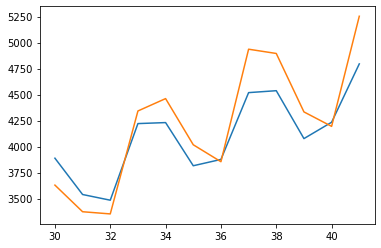

In [105]:
arima_preds.plot()
test.plot()

In [106]:
models = ['ARIMA','Simple Exp','Holts','Winters AA','Winters AM','Winters MA','Winters MM']
values = [arima_rms,ses_rms,holt_rms,Winter_aa_rms,Winter_am_rms,Winter_ma_rms,Winter_mm_rms]
Models = pd.DataFrame(values,models)
Models

,0
ARIMA,258.354827
Simple Exp,860.883355
Holts,518.140926
Winters AA,417.140942
Winters AM,261.918739
Winters MA,212.666205
Winters MM,164.448985
